****Student Performance Indicator****

***Life cycle of Machine learning Project***

Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

***1) Problem statement***
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

***2) Data Collection***
The data consists of 8 column and 1000 rows.

**2.1 Import Data and Required Packages**

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library**

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing the CSV Data as Pandas Dataframe**

In [6]:
df= pd.read_csv("data/StudentsPerformance.csv")

**Show Top 5 Records**

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of Data Set**

In [8]:
df.shape

(1000, 8)

**2.2 Dataset information**

**1. gender** : Sex of students → (Male / Female)  
**2. race/ethnicity** : Ethnicity of students → (Group A, B, C, D, E)  
**3. parental level of education** : Parents' final education → (Bachelor's degree, Some college, Master's degree, Associate's degree, High school)  
**4. lunch** : Whether the student had lunch before the test → (Standard / Free or reduced)  
**5. test preparation course** : Completion of test prep course → (Completed / Not completed)  
**6. math score** : Score in math subject  
**7. reading score** : Score in reading subject  
**8. writing score** : Score in writing subject  


**3. Data Checks to Perform**

- **Check missing values**  
- **Check for duplicates**  
- **Check data types of each column**  
- **Check the number of unique values in each column**  
- **Check statistical summary of the dataset**  
- **Check various categories present in different categorical columns**



**3.1 Check Missing values**

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no missing values in the data set**


### 3.2 Check Duplicates


In [10]:
df.duplicated().sum()


0

There are no duplicate values in the dataset.


### 3.3 Check Data Types


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Unique Values in Each Column


In [13]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Descriptive Statistics


In [14]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.7 Exploring Data


In [25]:
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
print("Categories in 'gender' variable:     ", df['gender'].unique())
print("Categories in 'race/ethnicity' variable:  ", df['race/ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ", df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:     ", df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

df.head(2)


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Add Total Score and Average Columns


In [27]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [29]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


***Insights***

From above values we get students have performed the worst in Maths

Best performance is in reading section

## 4. Data Visualization  
### 4.1 Distribution of Average and Total Score


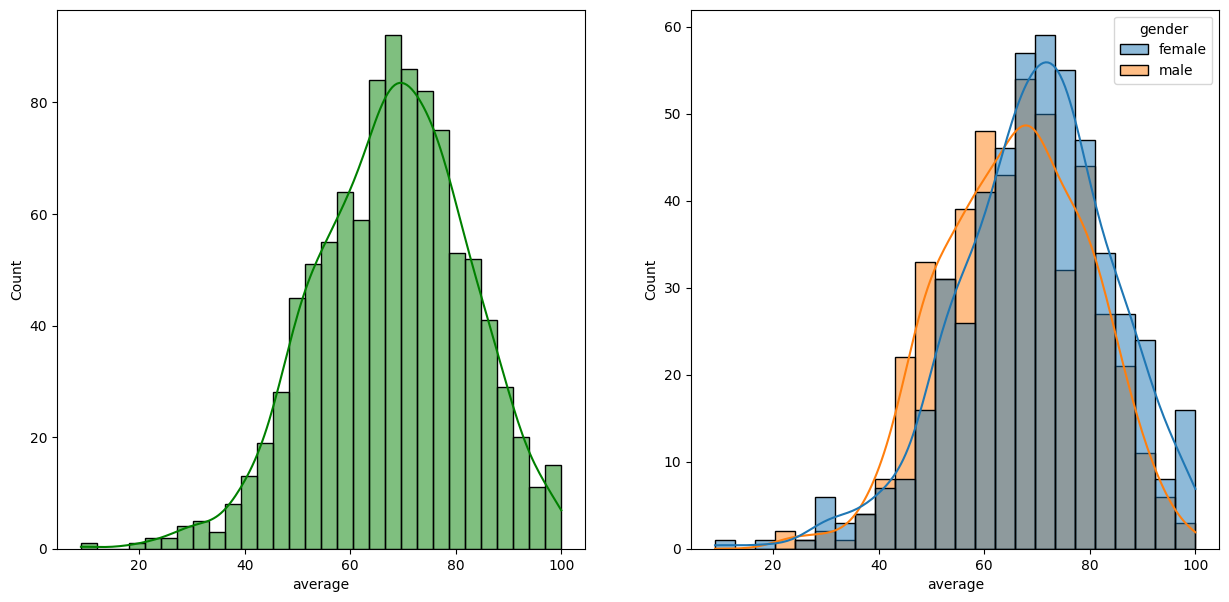

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

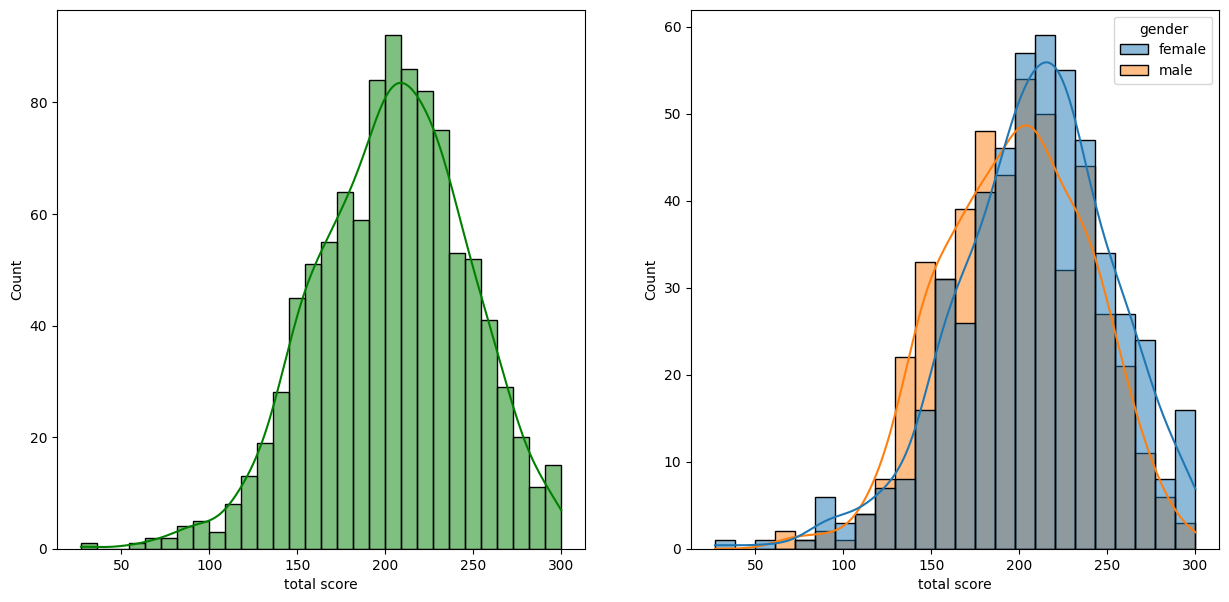

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

***Insights***

Female students tend to perform well then male students.

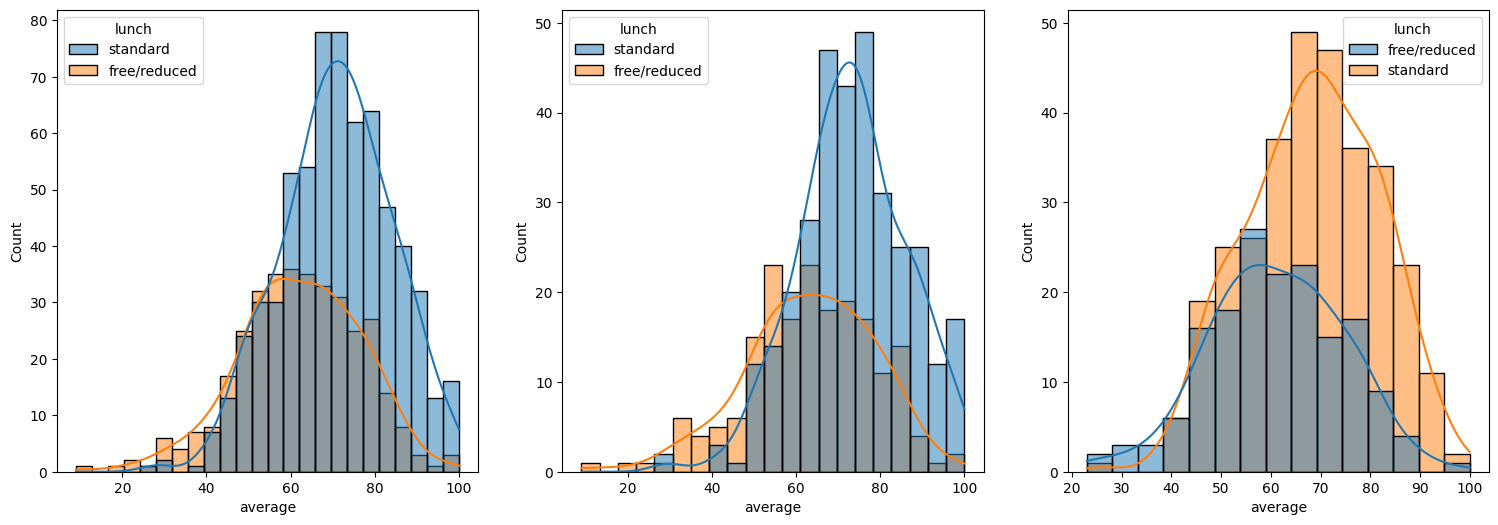

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()



***Insights***

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

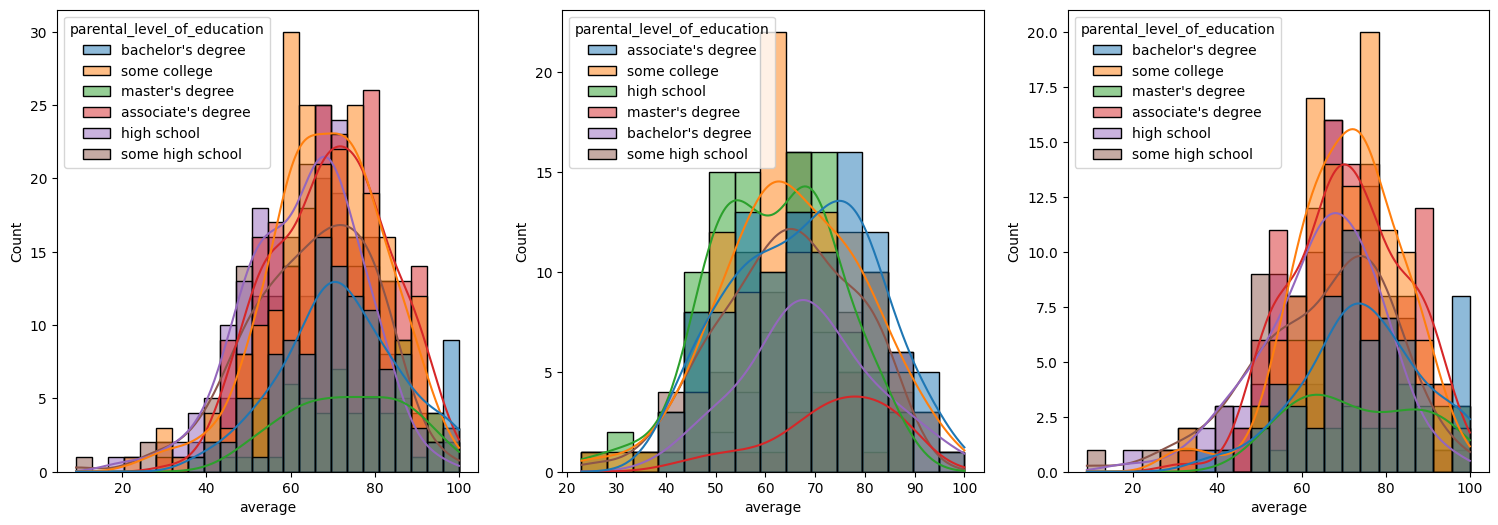

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()



***Insights***

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

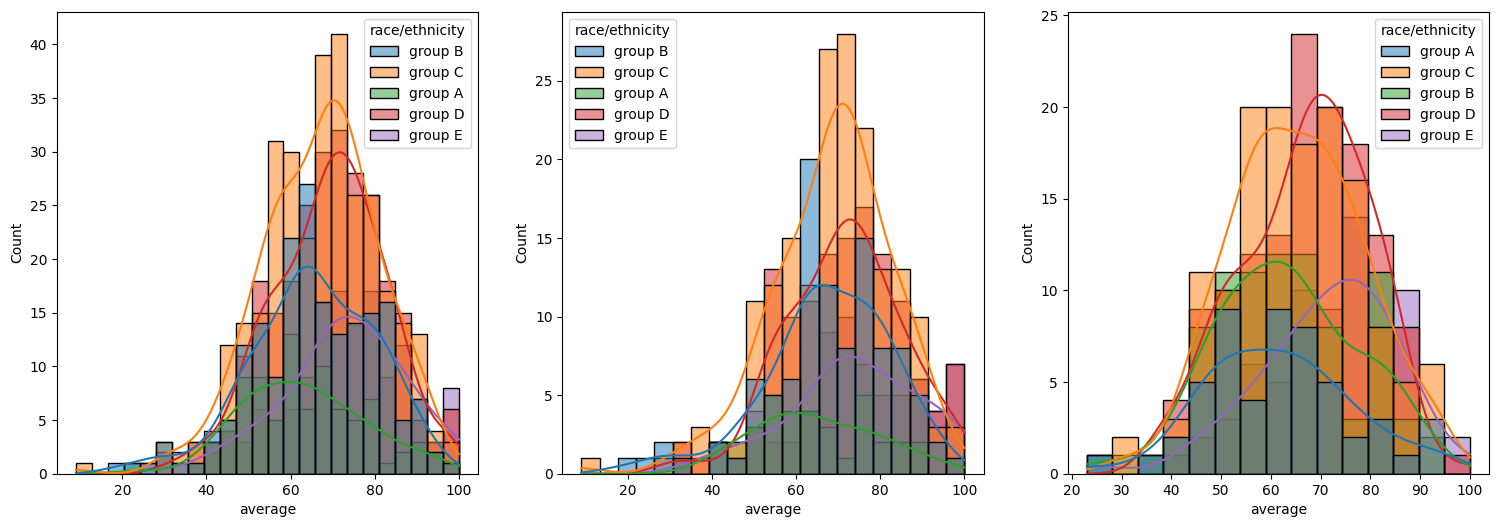

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()


***Insights***

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects


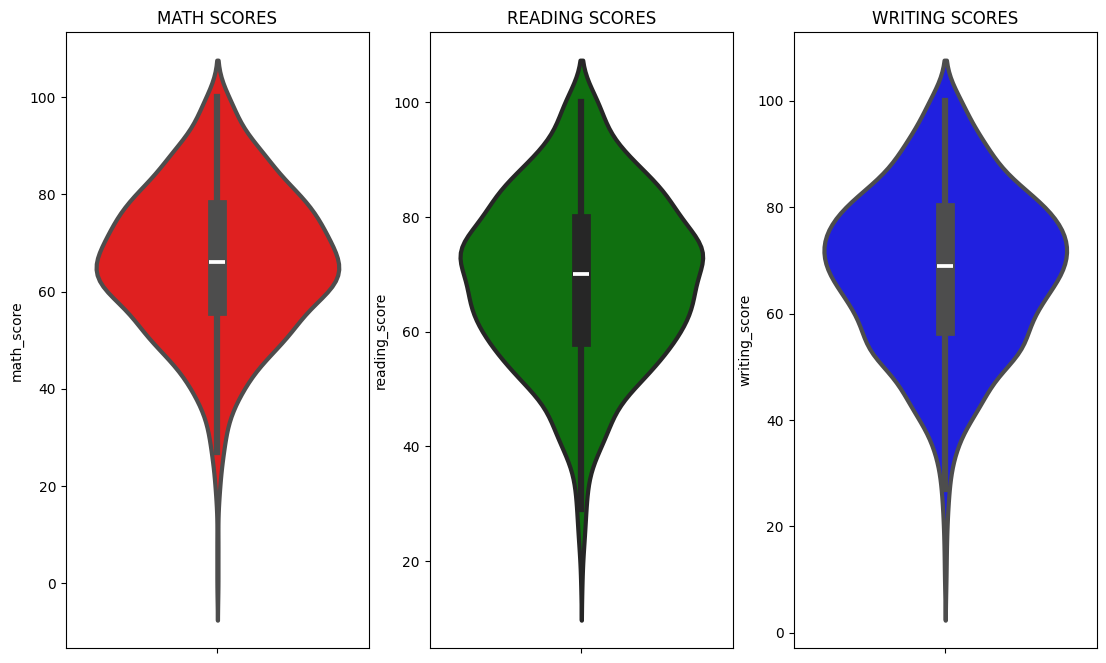

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


***Insights***

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate Analysis Using Pie Plots


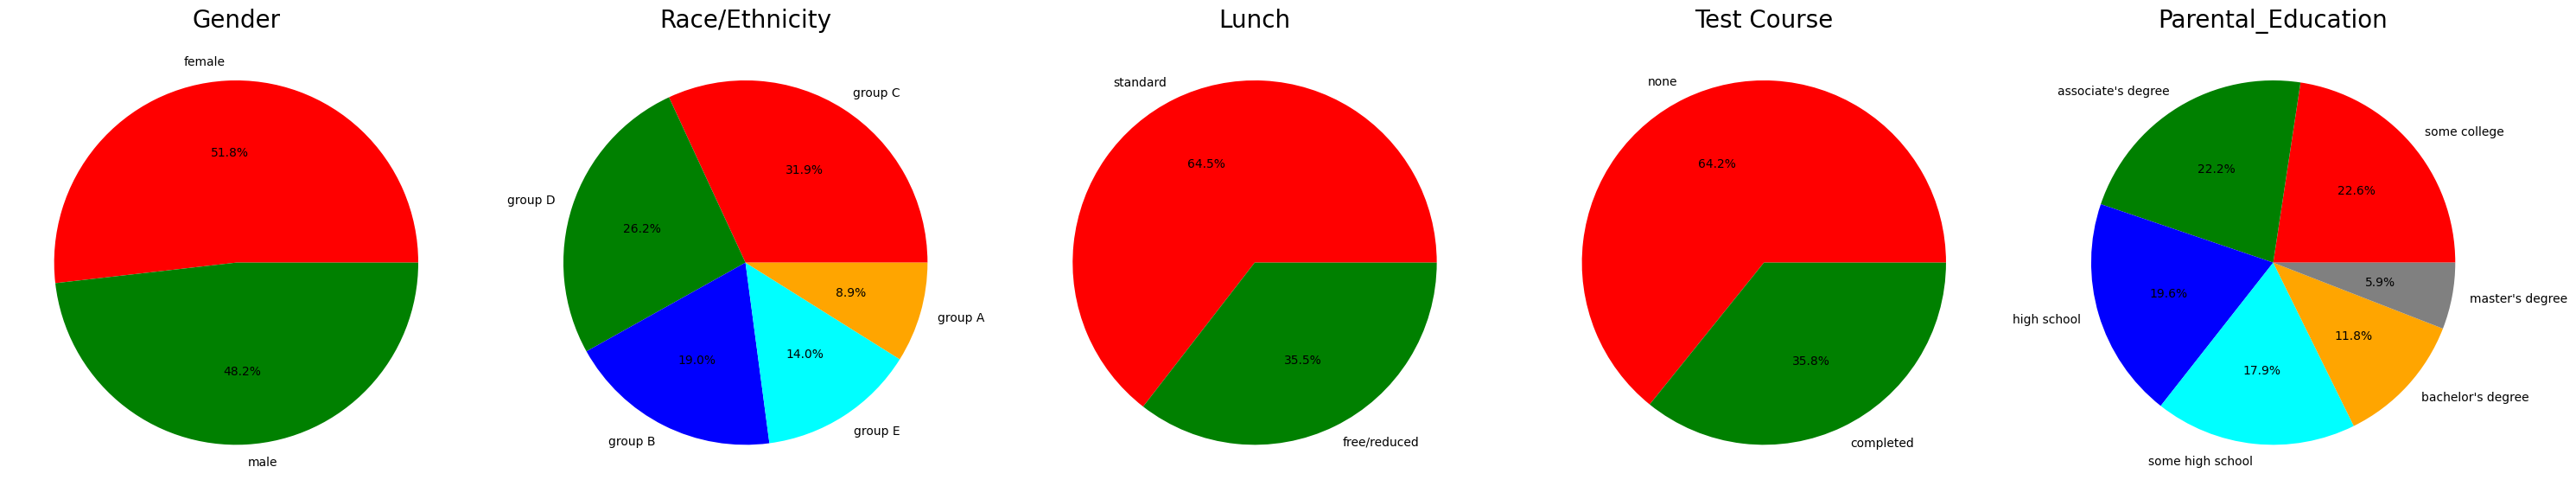

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
plt.pie(size, labels=labels, colors=['red', 'green'], autopct='%1.1f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
plt.pie(size, labels=labels, colors=['red', 'green'], autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
plt.pie(size, labels=labels, colors=['red', 'green'], autopct='%1.1f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Parental_Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


### Insights:
- Number of Male and Female students is almost equal.
- Most students belong to Group C, followed by Group D.
- Standard lunch is more common than free/reduced lunch.
- Most students did not take the test preparation course.
- Most parents have "some college" education, followed by "associate's degree".


## 4.4 Feature-wise Visualization
### 4.4.1 Gender Column
#### How is distribution of Gender?
#### Does gender have any impact on student's performance?


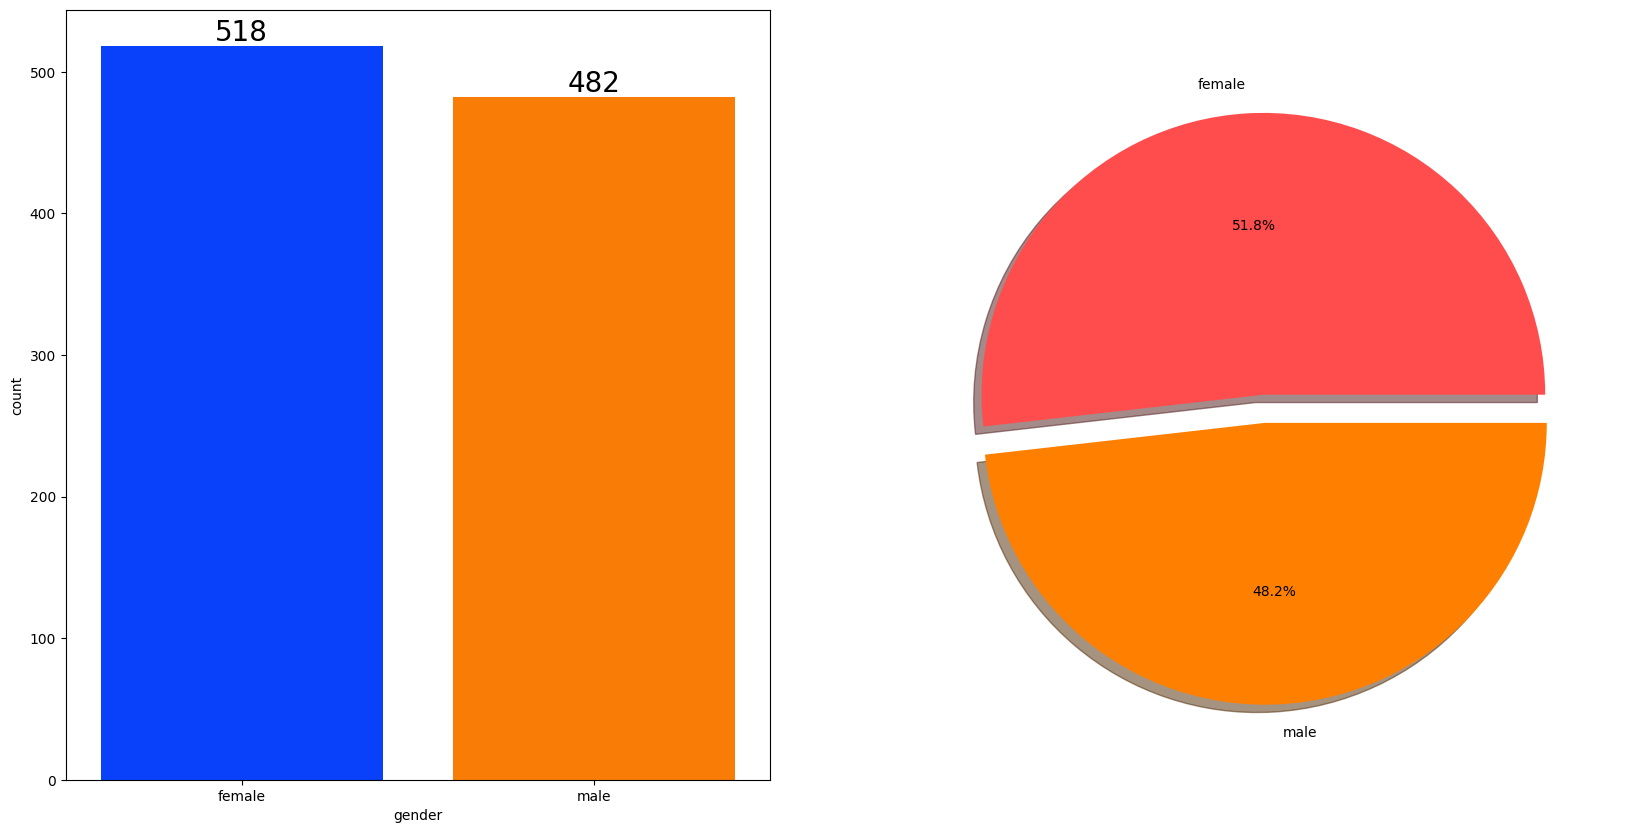

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart
plt.pie(x=df['gender'].value_counts(), labels=df['gender'].value_counts().index,
        explode=[0, 0.1], autopct='%1.1f%%', shadow=True,
        colors=['#ff4d4d', '#ff8000'])
plt.show()


#### Insights:
- Gender distribution is balanced: around 52% males and 48% females.


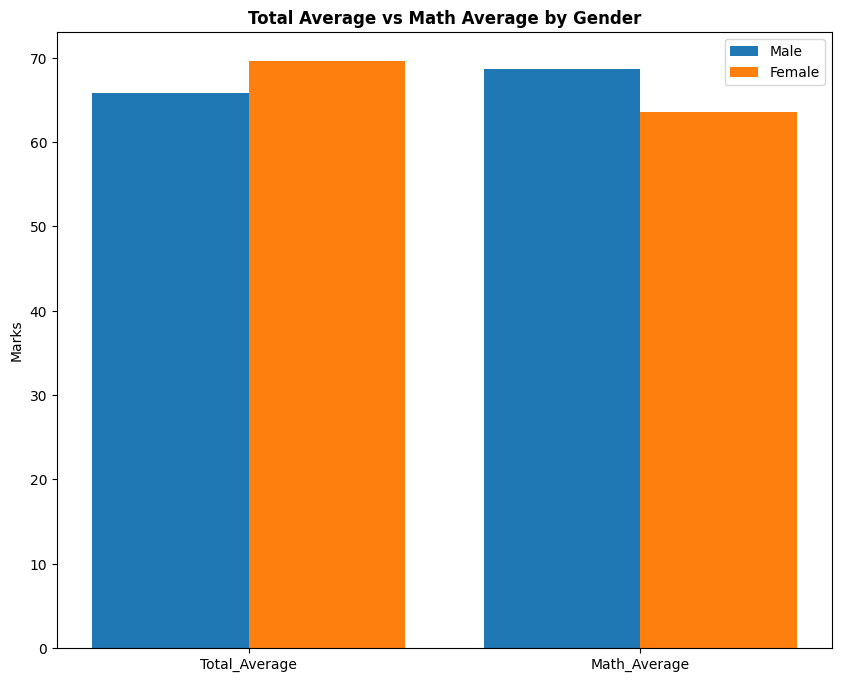

In [45]:
# Calculate average score
df['average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
gender_group = df.groupby('gender').mean(numeric_only=True)

female_scores = [gender_group['average'].loc['female'], gender_group['math_score'].loc['female']]
male_scores = [gender_group['average'].loc['male'], gender_group['math_score'].loc['male']]
X = ['Total_Average', 'Math_Average']
X_axis = np.arange(len(X))

plt.figure(figsize=(10, 8))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average by Gender", fontweight='bold')
plt.legend()
plt.show()


#### Insights:
- Females have a higher overall average score.
- Males perform slightly better in Math.


### 4.4.2 Race/Ethnicity Column
#### What is the group-wise distribution?
#### Does race/ethnicity affect student performance?


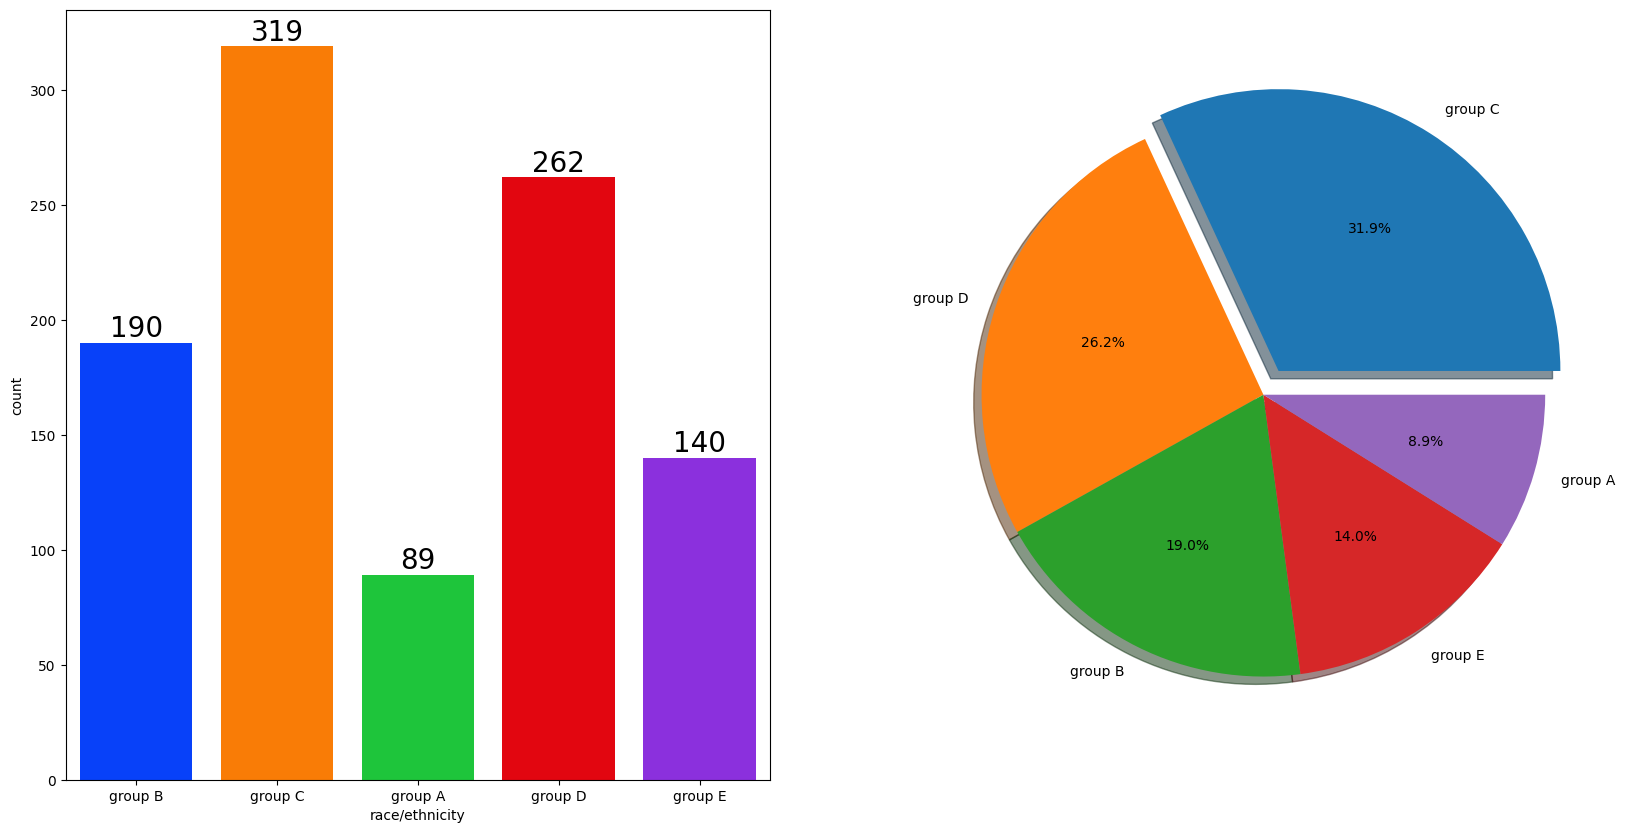

In [47]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),
        labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()


#### Insights:
- Group C and D have the highest student counts.
- Group A has the lowest representation.


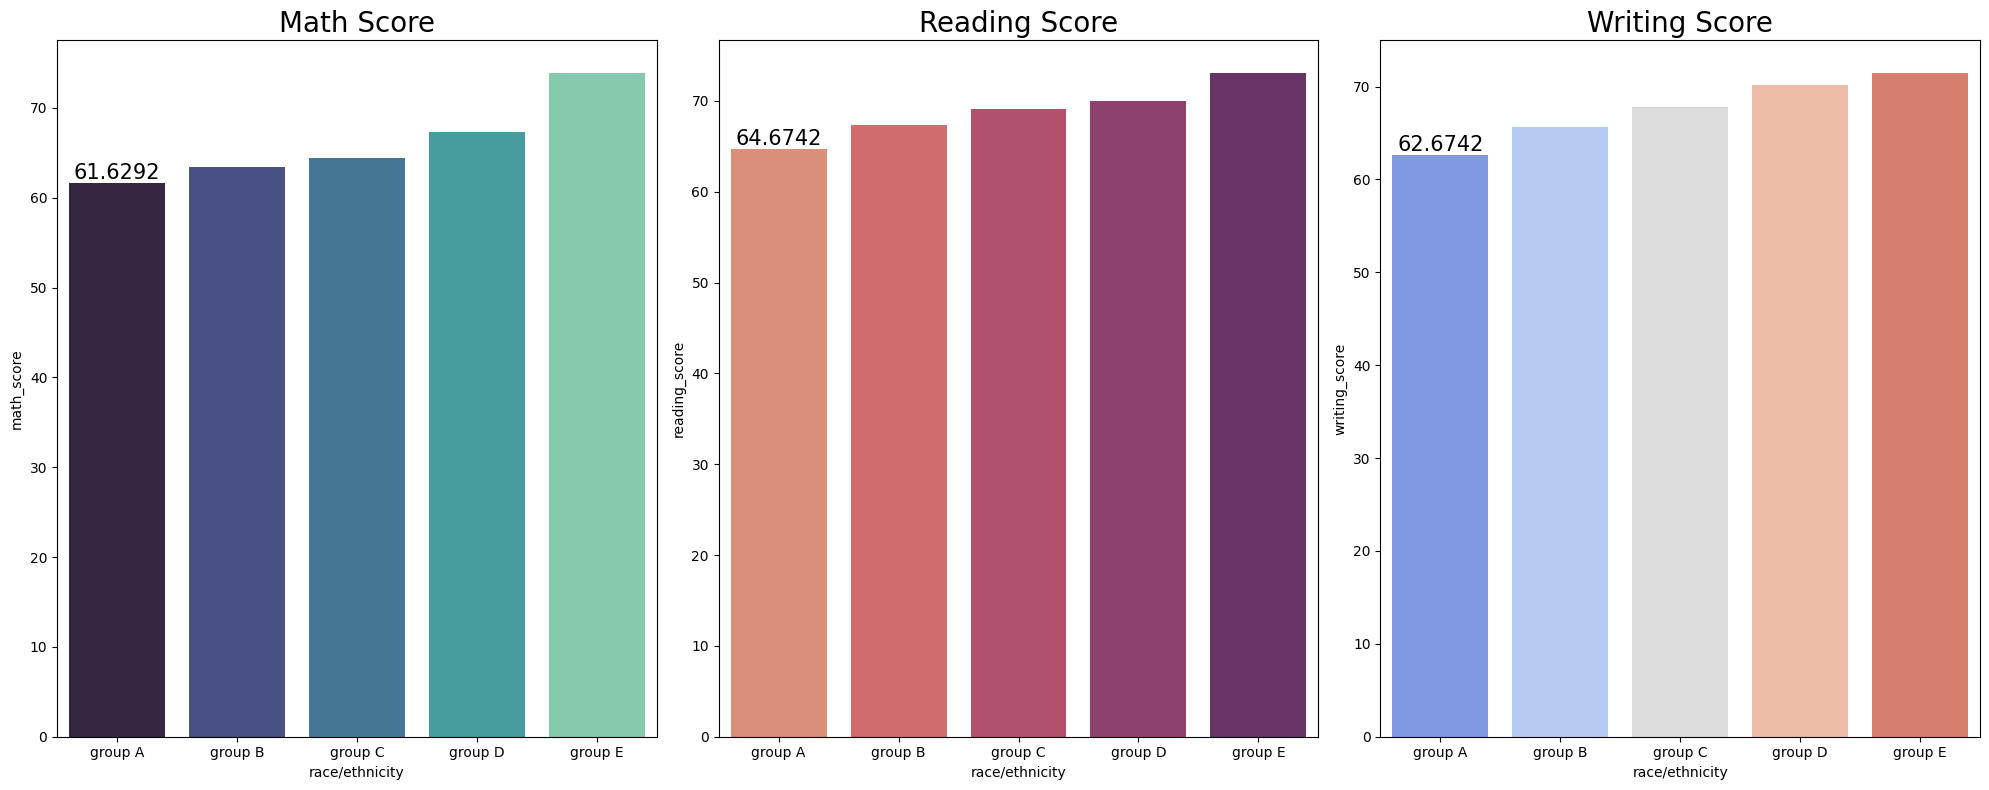

In [49]:
group_data = df.groupby('race/ethnicity').mean(numeric_only=True)
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=group_data.index, y=group_data['math_score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', size=20)
ax[0].bar_label(ax[0].containers[0], color='black', size=15)

sns.barplot(x=group_data.index, y=group_data['reading_score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', size=20)
ax[1].bar_label(ax[1].containers[0], color='black', size=15)

sns.barplot(x=group_data.index, y=group_data['writing_score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', size=20)
ax[2].bar_label(ax[2].containers[0], color='black', size=15)

plt.tight_layout()
plt.show()


#### Insights:
- Group E has the highest scores in all subjects.
- Group A has the lowest.
- Socioeconomic background (proxied by group) appears to influence academic performance.


### 4.4.3 Parental Level of Education
#### What is the distribution of parental education?
#### Does it impact student's performance?


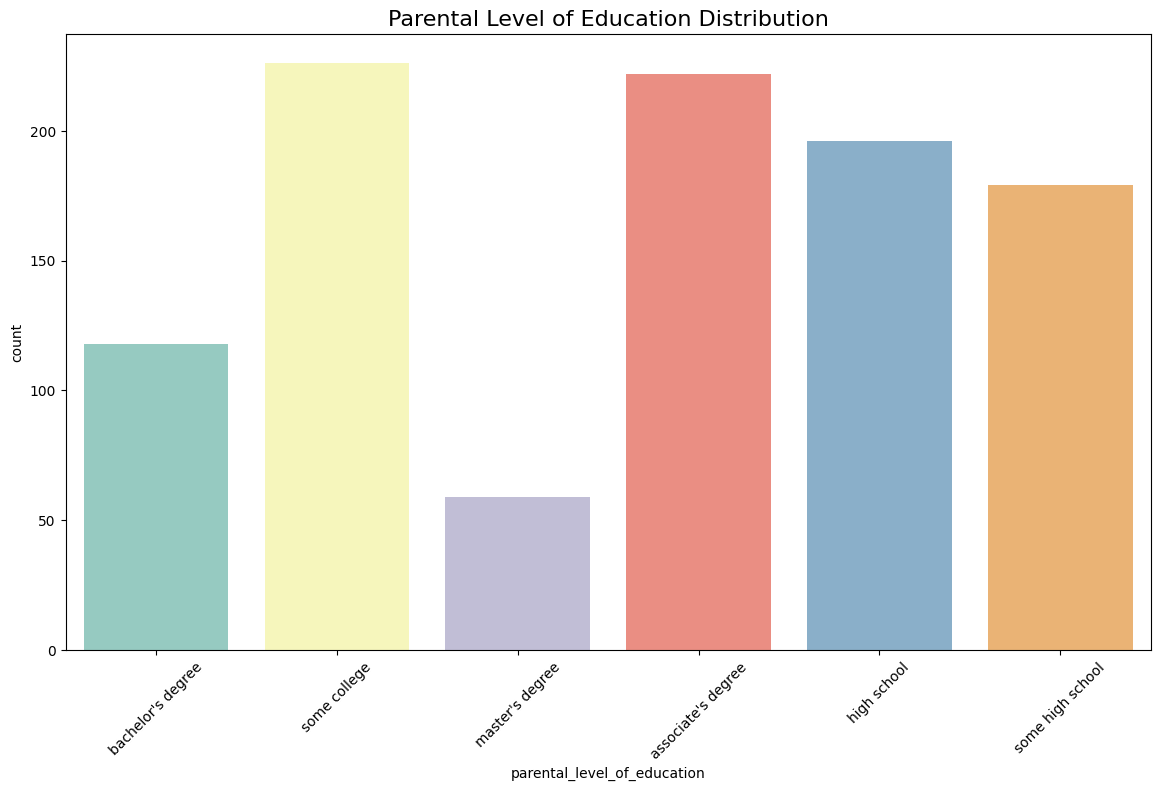

In [51]:
plt.figure(figsize=(14, 8))
sns.countplot(x='parental_level_of_education', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Parental Level of Education Distribution', fontsize=16)
plt.show()


#### Insights:
- Most parents have some college or associate's degree.
- Very few hold a master’s degree.


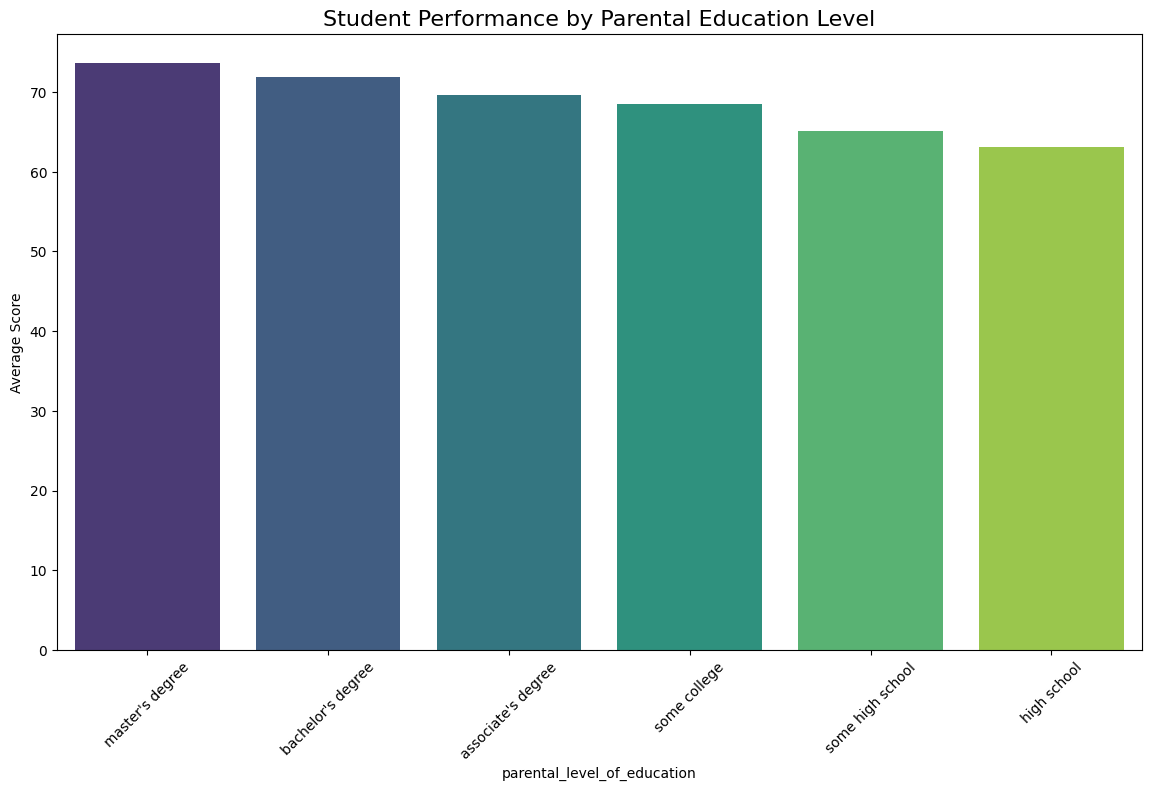

In [53]:
education_data = df.groupby('parental_level_of_education').mean(numeric_only=True).sort_values(by='average', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=education_data.index, y=education_data['average'], palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Average Score")
plt.title("Student Performance by Parental Education Level", fontsize=16)
plt.show()


#### Insights:
- Higher parental education generally correlates with better student performance.
- Master's degree holders’ children perform the best on average.


### 4.4.4 Lunch
#### Does lunch type influence performance?


<Figure size 1200x600 with 0 Axes>

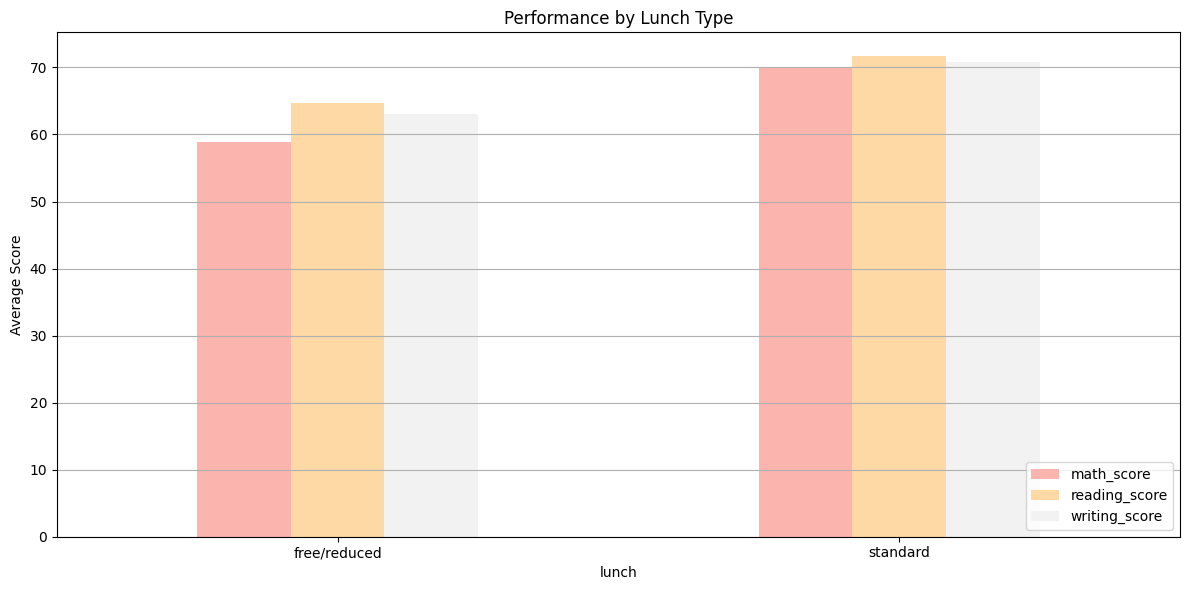

In [55]:
lunch_group = df.groupby('lunch').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
lunch_group[['math_score', 'reading_score', 'writing_score']].plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title('Performance by Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### Insights:
- Students with standard lunch perform significantly better in all subjects compared to those with free/reduced lunch.


### 4.4.5 Test Preparation Course
#### Does completing the course impact scores?


<Figure size 1200x600 with 0 Axes>

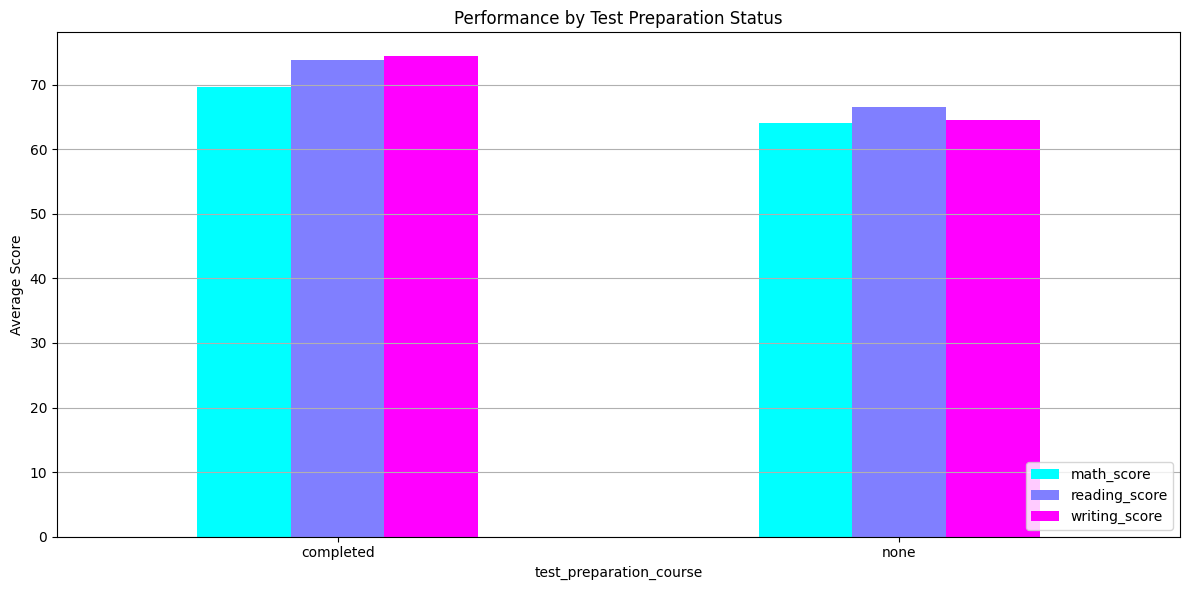

In [57]:
test_prep_group = df.groupby('test_preparation_course').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
test_prep_group[['math_score', 'reading_score', 'writing_score']].plot(kind='bar', figsize=(12, 6), colormap='cool')
plt.title('Performance by Test Preparation Status')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### Insights:
- Students who completed the test preparation course scored significantly higher across all subjects.


### 4.4.6 Outlier Detection
#### Let's visualize boxplots to identify any outliers in the scores.


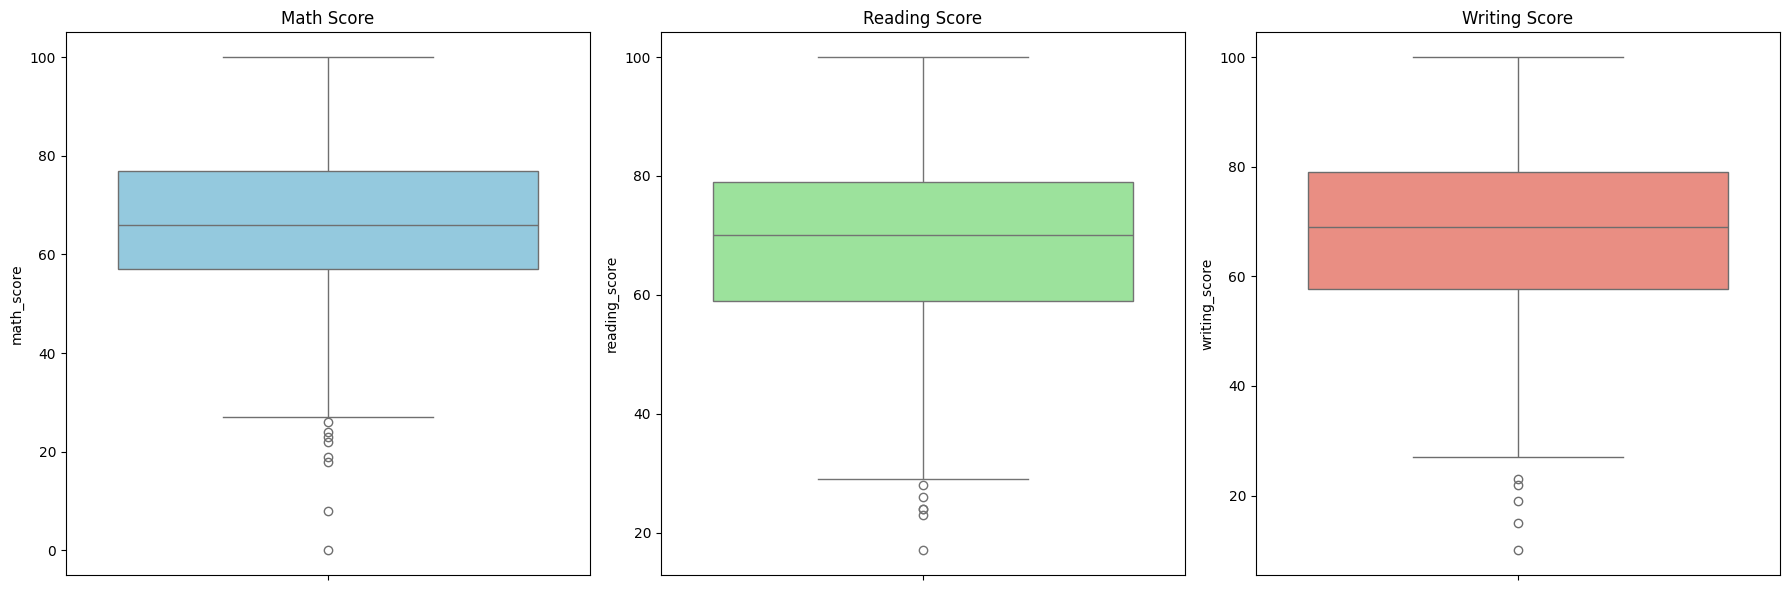

In [59]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['reading_score'], color='lightgreen')
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['writing_score'], color='salmon')
plt.title('Writing Score')

plt.tight_layout()
plt.show()


#### Insights:
- A few low outliers in each subject.
- No extreme high outliers.


### 4.5 Correlation Analysis
#### Let's compute and visualize the correlation between all numerical features.


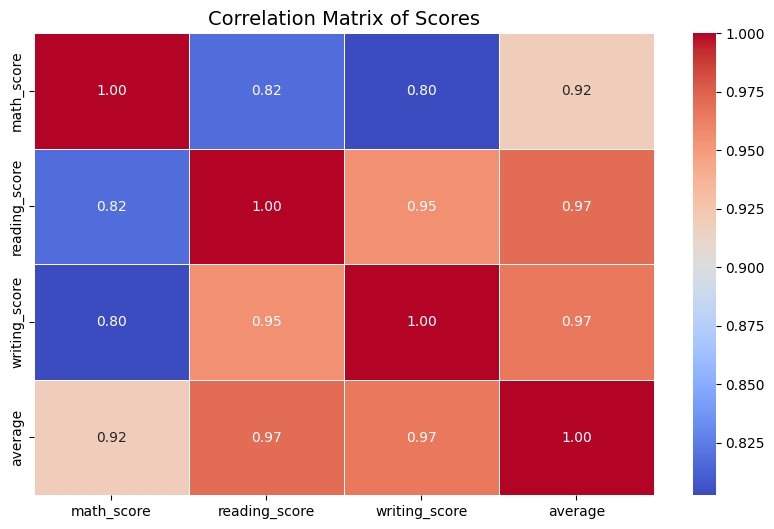

In [60]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'average']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Scores", fontsize=14)
plt.show()


#### Insights:
- Strong positive correlation between reading and writing scores (~0.95).
- Math has a lower but still positive correlation with reading and writing.
- The average score is highly correlated with each subject.


### 4.6 Pairplot & Score Distributions
#### Let's visually explore the relationships between different score variables using pair plots and histograms.


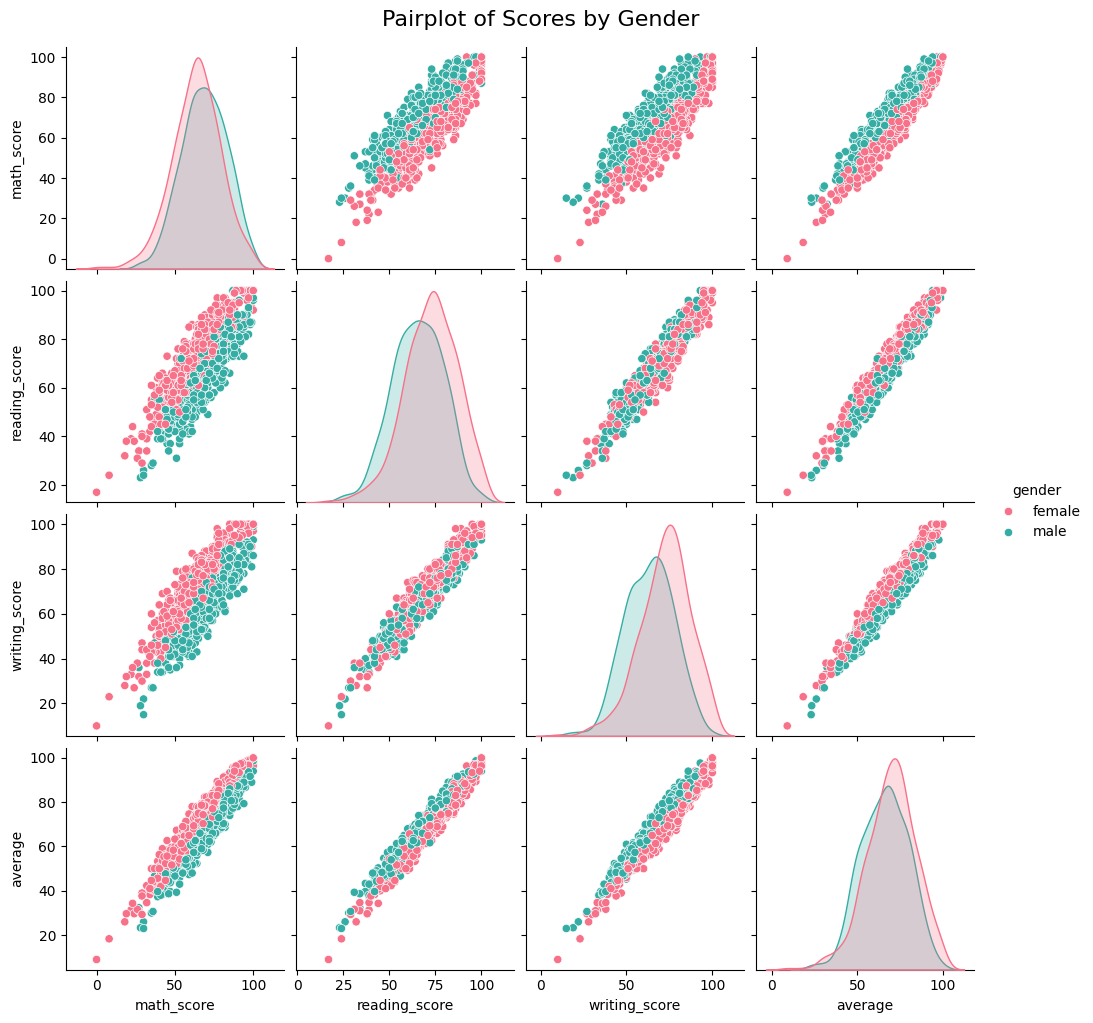

In [61]:
# Pairplot with gender hue
sns.pairplot(df[['math_score', 'reading_score', 'writing_score', 'average', 'gender']], hue='gender', palette='husl')
plt.suptitle("Pairplot of Scores by Gender", y=1.02, fontsize=16)
plt.show()


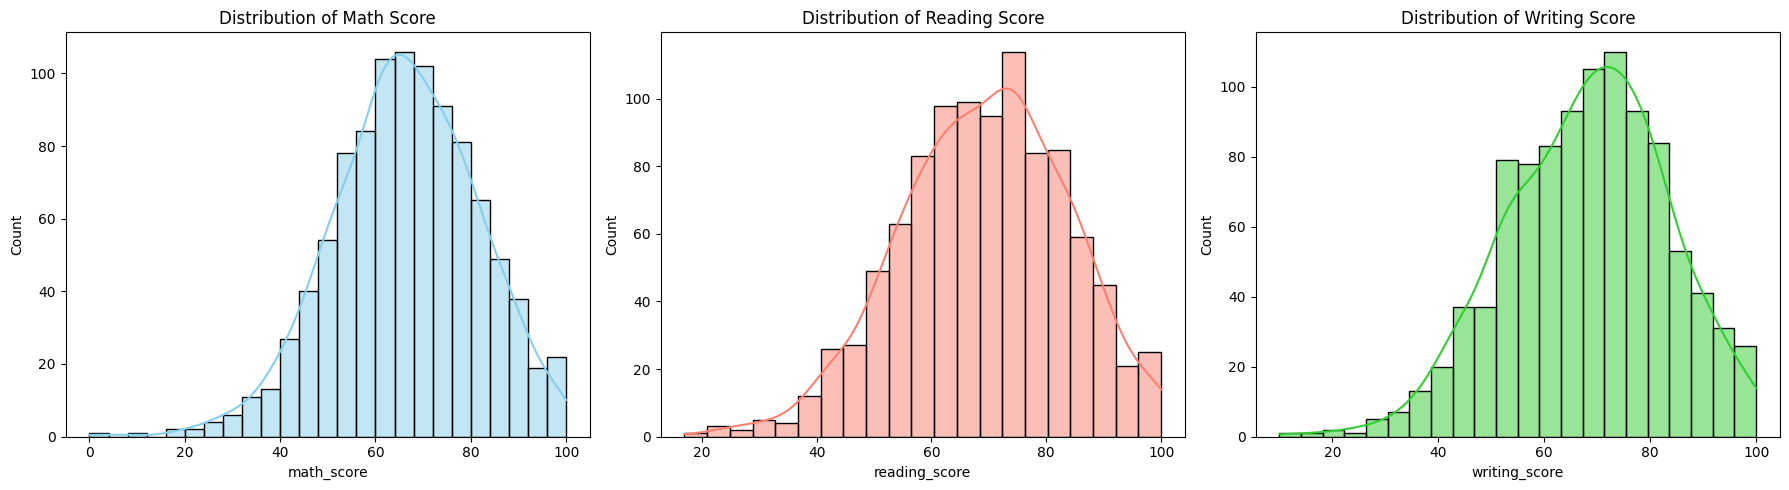

In [62]:
# Histograms for individual score distributions
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, color='skyblue')
plt.title('Distribution of Math Score')

plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, color='salmon')
plt.title('Distribution of Reading Score')

plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, color='limegreen')
plt.title('Distribution of Writing Score')

plt.tight_layout()
plt.show()


#### Insights:
- All scores show roughly normal distributions with some skew.
- Reading and writing scores are more closely related than math with others.
- Pairplot confirms strong positive linear relationships, especially between reading and writing.


## 5. Conclusions

### 🎓 Key Insights from the Analysis:

- **Gender**: Female students tend to score slightly higher on average, especially in reading and writing.
- **Race/Ethnicity**: Students from Group E perform the best, while Group A performs the lowest across all subjects.
- **Parental Level of Education**: Higher parental education (Bachelor's, Master's) is associated with better student performance.
- **Lunch Type**: Students with standard lunch perform better than those with free/reduced lunch.
- **Test Preparation Course**: Completing the test preparation course significantly boosts performance in all subjects.
- **Correlations**: 
  - Strong correlation between reading and writing scores.
  - Moderate correlation between math and other subjects.
  - The overall average score is highly correlated with all individual subject scores.
- **No Major Outliers** were found in the score distributions.

### ✅ Final Note:
This analysis suggests that socioeconomic factors and educational support (like parental education and test prep) have a measurable effect on student academic performance.
